In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 6.6MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [ ]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
dados.columns = ["nao_finalizado", "horas_estimadas","preco"]
troca = {
    0:1,
    1:0
}

dados["finalizado"] = dados.nao_finalizado.map(troca)

dados.head()

,nao_finalizado,horas_estimadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


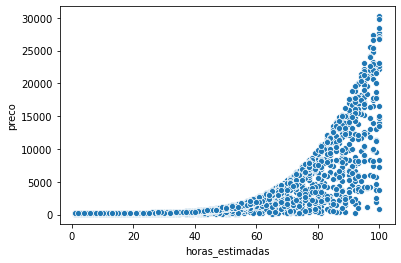

In [ ]:
import seaborn as sns

sns.scatterplot(x="horas_estimadas", y="preco", data=dados)

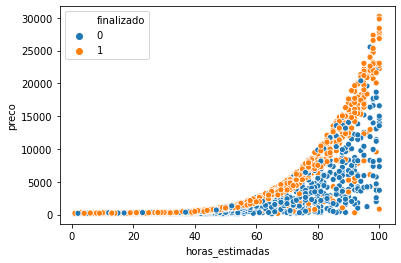

In [ ]:
sns.scatterplot(x="horas_estimadas",hue="finalizado",y="preco", data=dados)

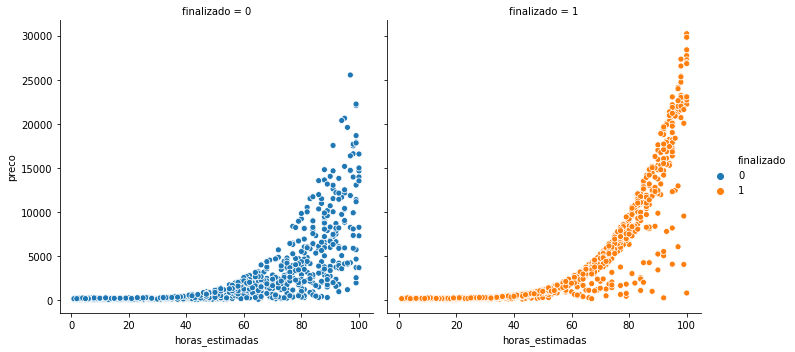

In [ ]:
sns.relplot(x="horas_estimadas",hue="finalizado",y="preco", col="finalizado", data=dados)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

x = dados[["horas_estimadas","preco"]]
y = dados["finalizado"]

SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, 
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)

modelo =  LinearSVC(random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x),len(teste_x)))
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)


print("Taxa de acerto %.2f%%" % (taxa_de_acerto * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np

previsoes_de_base = np.ones(len(teste_x))

acuracia = accuracy_score(teste_y, previsoes_de_base)

print("A acurácia do algoritmo baseline foi de %.2f%%" % (acuracia * 100))

A acurácia do algoritmo baseline foi de 52.59%


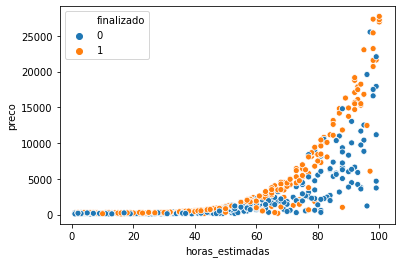

In [ ]:
sns.scatterplot(x="horas_estimadas",y="preco",hue=teste_y,data=teste_x)

In [ ]:
x_min = teste_x.horas_estimadas.min()
x_max = teste_x.horas_estimadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [ ]:
pixels = 100
eixo_x = np.arange(x_min,x_max,(x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max,(y_max - y_min) / pixels)

xx,yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)

Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

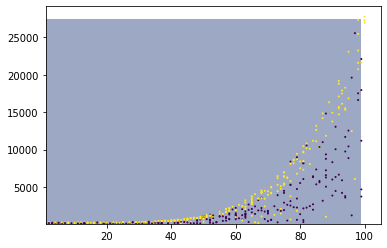

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z, alpha=0.5)
plt.scatter(teste_x.horas_estimadas, teste_x.preco, c=teste_y, s=1)

Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto 54.07%


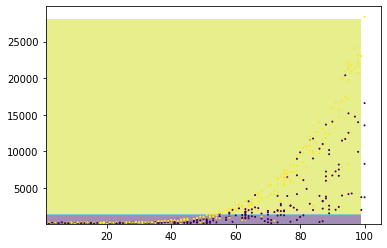

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

x = dados[["horas_estimadas","preco"]]
y = dados["finalizado"]

SEED = 8
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, 
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)

modelo = SVC(random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x),len(teste_x)))
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)

print("Taxa de acerto %.2f%%" % (taxa_de_acerto * 100))

x_min = teste_x.horas_estimadas.min()
x_max = teste_x.horas_estimadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min,x_max,(x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max,(y_max - y_min) / pixels)

xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z, alpha=0.5)
plt.scatter(teste_x.horas_estimadas, teste_x.preco, c=teste_y, s=1)

Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto 71.30%


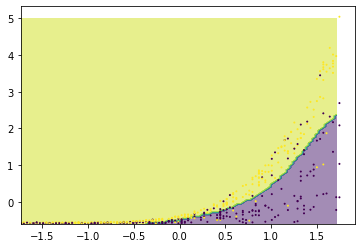

In [ ]:
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

x = dados[["horas_estimadas","preco"]]
y = dados["finalizado"]

SEED = 8
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, 
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)

modelo = SVC(random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(raw_treino_x),len(raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)

print("Taxa de acerto %.2f%%" % (taxa_de_acerto * 100))

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min,x_max,(x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max,(y_max - y_min) / pixels)

xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z, alpha=0.5)
plt.scatter(data_x, data_y, c=teste_y, s=1)